In [54]:
import kagglehub
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path = kagglehub.dataset_download('parisrohan/credit-score-classification')

100%|██████████| 9.51M/9.51M [00:01<00:00, 6.23MB/s]


Extracting files...


In [6]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\loitv\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1


In [40]:
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

C:\Users\loitv\AppData\Local\Temp\ipykernel_2964\170613806.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(f'{path}/train.csv')


In [41]:
print(train.shape), print(test.shape)

(100000, 28)
(50000, 27)


(None, None)

In [42]:
test.shape[1]

27

In [43]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [44]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [45]:
train[0:5]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [66]:
for col in train.columns:
    ratio = 1 - np.round(train[col].count()/100000, 4)
    if ratio > 0:
        print(f'{col} has {100*ratio} value')

Name has 9.98 value
Monthly_Inhand_Salary has 15.000000000000002 value
Type_of_Loan has 11.409999999999998 value
Num_of_Delayed_Payment has 6.999999999999995 value
Num_Credit_Inquiries has 1.959999999999995 value
Credit_History_Age has 9.030000000000005 value
Amount_invested_monthly has 4.479999999999995 value
Monthly_Balance has 1.200000000000001 value


In [87]:
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

**ĐÁNH GIÁ TỔNG QUAN VỀ DỮ LIỆU**

### **QUY TRÌNH THỰC HIỆN**
1. Đánh giá tổng quan về dữ liệu
2. Xử lý các loại dữ liệu Numerical và Categorical
3. Xây dựng các model

    3.1. Model Logistic  (Không sử dụng, do thường sử dụng khi nhãn chỉ có 2 nhóm)

    3.2. Model dựa trên Decision Tree
    
    3.3. Model dựa trên Random Forest
    
    3.4. Model dựa trên LightGBM, XGBoost, CatBoost
    
    3.4. Model dựa trên Neural Network
4. Đánh giá và so sánh các model với nhau
    
    4.1. Các chỉ số được sử dụng để so sánh
    
    4.2. So sánh và lựa chọn ra model tốt nhất

5. Tuning model
    
    5.1. Chọn ra loại model tốt nhất
    
    5.2. Tuning lại loại model đã chọn với các tham số

#### 1. Đánh giá tổng quan về dữ liệu

C:\Users\loitv\AppData\Local\Temp\ipykernel_2964\2520128275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=train, palette='viridis')


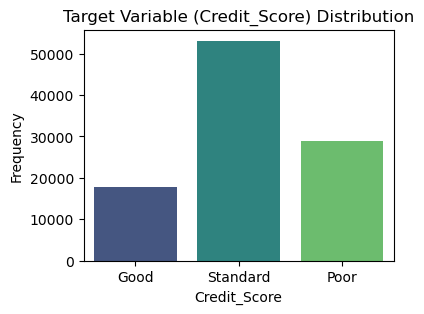

In [27]:
# Xem xét số lượng dữ liệu của các nhóm đầu ra
plt.figure(figsize=(4,3))
sns.countplot(x='Credit_Score', data=train, palette='viridis')
plt.title('Target Variable (Credit_Score) Distribution')
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.show()

In [33]:
for idx, column in enumerate(train.columns):
    print(f'{idx}.{column} has: {train[column].nunique()} unique values')

0.ID has: 100000 unique values
1.Customer_ID has: 12500 unique values
2.Month has: 8 unique values
3.Name has: 10139 unique values
4.Age has: 1788 unique values
5.SSN has: 12501 unique values
6.Occupation has: 16 unique values
7.Annual_Income has: 18940 unique values
8.Monthly_Inhand_Salary has: 13235 unique values
9.Num_Bank_Accounts has: 943 unique values
10.Num_Credit_Card has: 1179 unique values
11.Interest_Rate has: 1750 unique values
12.Num_of_Loan has: 434 unique values
13.Type_of_Loan has: 6260 unique values
14.Delay_from_due_date has: 73 unique values
15.Num_of_Delayed_Payment has: 749 unique values
16.Changed_Credit_Limit has: 4384 unique values
17.Num_Credit_Inquiries has: 1223 unique values
18.Credit_Mix has: 4 unique values
19.Outstanding_Debt has: 13178 unique values
20.Credit_Utilization_Ratio has: 100000 unique values
21.Credit_History_Age has: 404 unique values
22.Payment_of_Min_Amount has: 3 unique values
23.Total_EMI_per_month has: 14950 unique values
24.Amount_inves

C:\Users\loitv\AppData\Local\Temp\ipykernel_2964\10026221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis', order=train[col].value_counts().index)


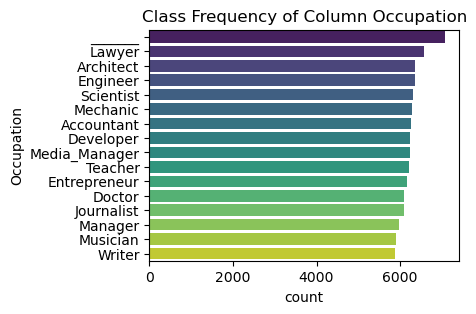

C:\Users\loitv\AppData\Local\Temp\ipykernel_2964\10026221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis', order=train[col].value_counts().index)


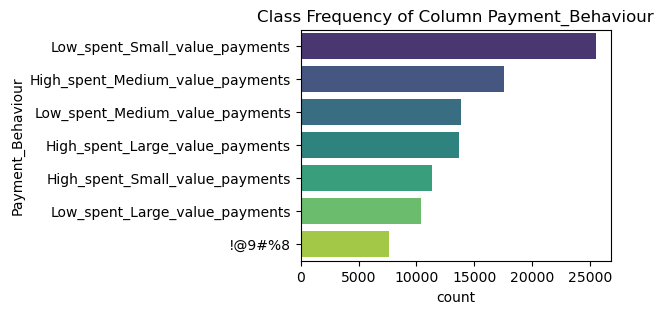

In [34]:
# Xem xét nghề nghiệp và hành vi tiêu dùng
categorical_to_plot = ['Occupation', 'Payment_Behaviour']
for col in categorical_to_plot:
    plt.figure(figsize=(4,3))
    sns.countplot(y=col, data=train, palette='viridis', order=train[col].value_counts().index)
    plt.title(f'Class Frequency of Column {col}')
    plt.show()

**Data Engineering**

Các công việc cần làm
- Chuyển đổi dữ liệu của cột Tuổi sang số
- Chuyển đổi các cột dữ liệu categorical sang giá trị số (Encoder)

Xử lý các trường dữ liệu với kiểu dữ liệu chưa đúng
- Các trường chỉ có dữ liệu số: pd.to_numeric(col, error='coerce') để xử lý các trường hợp không phải giá trị số sẽ trả về NaN
- Các trường chưa đúng kiểu dữ liệu thì trả về đúng kiểu dữ liệu
- Các trường dữ liệu là object, nhưng dạng categorical, thì sử dụng: pd.Categorical() -> Chuyển đổi dữ liệu kiểu danh mục sang dữ liệu mã hóa
- Các dữ liệu dạng one-hot: pd.get_dummies(df, columns = ['Color'])

Đối với các trường có giá trị NULL, NaN:
- Với dữ liệu là dạng numerical: sử dụng Mean/Median: 
  - Cách 1: sử dụng Fillna('mean')
  - Cách 2: Sử dụng SimpleImputer(strategy='mean')
- Đối với dữ liệu dạng object chuyển đổi qua:
  - Sử dụng dữ liệu phổ biến nhất -> mode -> train['x'].mode()[0]
  - Điền với một giá trị cố định (Unknown)
  - Điền với giá trị phía trước/phía sau: df[col].fillna(method = 'ffill') # ffill - forward fill, bfill - backward fill


In [83]:
# Chuyển giá trị cột Credit_History_Age về dạng số
# Chuyển đổi giá trị của cột "Credit_History_Age" sang giá trị số
import re
def convert_to_months(value):
    try:
        match = re.match(r"(?P<years>\d+)\s+Years?\s+and\s+(?P<months>\d+)\s+Months?", value)
        if match:
            years = int(match.group('years'))
            months = int(match.group('months'))
            return years*12 + months 
        else:
            return None 
    except Exception as e:
        return None 

def process_column(data, column):
    data[column] = data[column].apply(lambda x: convert_to_months(str(x)) if pd.notna(x) else None)
    mean_value = data[column].mean(skipna=True)
    mean_value = 0 if pd.isna(mean_value) else int(mean_value)
    
    data[column] = data[column].fillna(mean_value).astype('Int64')


column = 'Credit_History_Age'

if column in train.columns:
    process_column(train, column)
if column in test.columns:
    process_column(test, column)

In [84]:
# Xem lại các dữ liệu
df_train = train.copy()
df_test = test.copy()

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [38]:
# Phân loại các cột theo loại dữ liệu

int_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_History_Age']

num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
            'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
            'Amount_invested_monthly', 'Monthly_Balance']

# Các cột còn lại sẽ là dữ liệu categorical


In [88]:
for df in [df_train, df_test]:
    for col in num_cols:
        # Chuyển đổi các dữ liệu sang dạng số, nếu lỗi thì trả NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Nếu giá trị là âm, thì trả về giá trị tuyệt đối
        if (df[col] < 0).any():
            df[col] = df[col].abs()
        
        # Fill các giá trị NaN với median
        median_val = df[col].median()
        df[col] =df[col].fillna(median_val)

    # Trường hợp dữ liệu categorical
    cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:", cat_cols)

Non-numeric columns: ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [92]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill các giá trị còn lại (categorical) với các giá trị phổ biến nhất
for col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

# Mã hóa các giá trị categorical
label_encoder= {}
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    label_encoder[col] = le 

scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])


X = df_train.drop('Credit_Score', axis=1)
y = df_train['Credit_Score']

In [119]:
y = pd.Categorical(y).codes
y

array([0, 0, 0, ..., 1, 2, 1], dtype=int8)

In [120]:
# bắt đầu tiến trình tạo model và đánh giá các giá trị
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Chia tách các tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model rf cơ bản 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

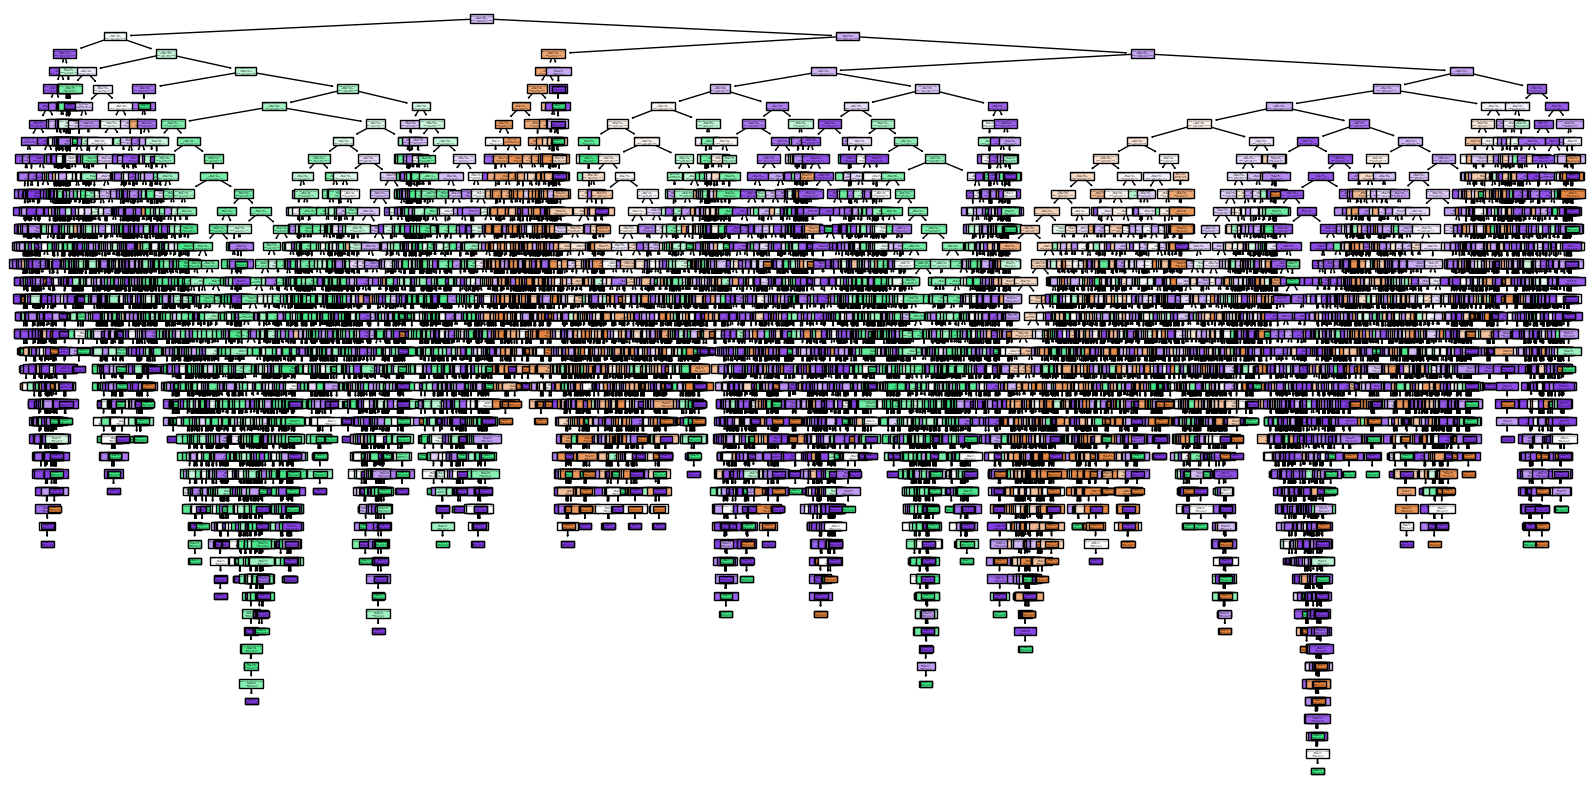

In [126]:
# Đánh giá model cơ bản 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=df_train['Credit_Score'])
plt.show()

In [142]:
# Xây dựng nhiều loại model song song và so sánh các loại model với nhau
# Import các model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb 
import catboost as cb 
from sklearn.metrics import accuracy_score

# Chia tách các tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Dự đoán
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# Model RandomForest
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)
# Dự đoán
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Model Decision Tree
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
# Dự đoán
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

# Model Decision Tree
cb_model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True)
cb_model.fit(X_train, y_train)
# Dự đoán
y_pred_cb = cb_model.predict(X_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5409
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 27
[LightGBM] [Info] Start training from score -1.721697
[LightGBM] [Info] Start training from score -1.241156
[LightGBM] [Info] Start training from score -0.630759


In [143]:
# Xem xét cả độ chính xác trên tập train của từng model 

acc_train_dt = accuracy_score(dt_model.predict(X_train), y_train)
acc_train_rf = accuracy_score(rf_model.predict(X_train), y_train)
acc_train_lgb = accuracy_score(lgb_model.predict(X_train), y_train)
acc_train_cb = accuracy_score(cb_model.predict(X_train), y_train)


In [144]:
# Tạo bảng kết quả so sánh các model
results = {
    'Model': ['Decision Tree', 'Random Forest', 'LightGBM', 'CatBoost'],
    'Accuracy_train': [acc_train_dt, acc_train_rf, acc_train_lgb, acc_train_cb],
    'Accuracy_test': [accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb]
}

results_df = pd.DataFrame(results)

print(results_df)

           Model  Accuracy_train  Accuracy_test
0  Decision Tree        1.000000        0.69145
1  Random Forest        1.000000        0.79075
2       LightGBM        0.763550        0.73335
3       CatBoost        0.709912        0.70240


Có thể thấy, ở trên tập Train, các model Decision Tree và Random Forest dự đoán tỷ lệ chính xác 100%, nhưng ở tập test, tỷ lệ này thấp hơn rất nhiều --> Có hiện tượng Overfitting ở trên 2 model này

Trong khi đó, Độ chính xác của 2 model còn lại là LightGBM và CatBoost đều khá cao ở trên 2 model, nên chúng ta có thể kết luận là mode LightGBM cho kết quả tốt nhất trong 4 Model

In [145]:
# Xem xét các chỉ số phân loại khác của model LightGBM
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_pred_lgb, y_test))

[[2430  299 1069]
 [  43 4018 1311]
 [1054 1557 8219]]


In [148]:
labels = [0, 1, 2]

In [149]:
print(classification_report(y_pred_lgb, y_test, labels = labels))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      3798
           1       0.68      0.75      0.71      5372
           2       0.78      0.76      0.77     10830

    accuracy                           0.73     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.73      0.73      0.73     20000



In [150]:
# Xem xét thuật toán CatBoost
print(confusion_matrix(y_pred_cb, y_test))
print(classification_report(y_pred_cb, y_test, labels = labels))

[[2215  339 1219]
 [  72 3783 1330]
 [1240 1752 8050]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      3773
           1       0.64      0.73      0.68      5185
           2       0.76      0.73      0.74     11042

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



In [141]:
print(confusion_matrix(y_pred_dt, y_test))
print(classification_report(y_pred_dt, y_test))

[[2196  159 1243]
 [ 185 3905 1669]
 [1185 1735 7723]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      3598
           1       0.67      0.68      0.68      5759
           2       0.73      0.73      0.73     10643

    accuracy                           0.69     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.69      0.69      0.69     20000



In [ ]:
print(confusion_matrix(dt_model.predict, y_test))
print(classification_report(y_pred_dt, y_test))